<a href="https://colab.research.google.com/github/MuhsinaPP/MachineLearning/blob/master/salaries_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Loading Dataset**

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Dataset/salaries (6).csv")
data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


**Studying data**

In [4]:
data.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [5]:
data.tail()

,company,job,degree,salary_more_then_100k
11,facebook,sales executive,masters,1
12,facebook,business manager,bachelors,1
13,facebook,business manager,masters,1
14,facebook,computer programmer,bachelors,1
15,facebook,computer programmer,masters,1


In [6]:
data.shape

(16, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [8]:
data.describe()

,salary_more_then_100k
count,16.000
mean,0.625
std,0.500
min,0.000
25%,0.000
50%,1.000
75%,1.000
max,1.000


In [9]:
data.isnull().any()

,0
company,False
job,False
degree,False
salary_more_then_100k,False


**PreProcessing**

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label=LabelEncoder()

In [12]:
newcompany=label.fit_transform(data['company'])
newjob=label.fit_transform(data['job'])
newdegree=label.fit_transform(data['degree'])

In [13]:
data['company']=newcompany
data['job']=newjob
data['degree']=newdegree

In [14]:
data

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [15]:
len(data)

16

**X and y matrix**

In [16]:
x=data[['company','job','degree']]
y=data['salary_more_then_100k']

**Splitting into train and test datasets**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=1)

**DecisionTreeClassifier Model**

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model=DecisionTreeClassifier()

In [21]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [22]:
model.score(xtest,ytest)

0.75

In [23]:
y_act=ytest
y_pred=model.predict(xtest)

In [24]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_act,y_pred)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

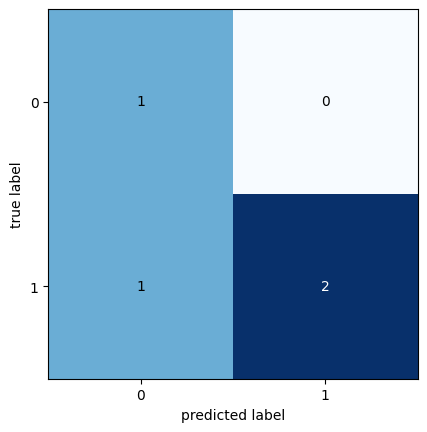

In [25]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cf)

In [27]:
from sklearn.metrics import classification_report
report = classification_report(y_act, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

